In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_g = ImageDataGenerator( rescale=1./255,rotation_range= 10, 
                             validation_split = 0.15,     
                             horizontal_flip=True, vertical_flip = True)
train_gen = train_g.flow_from_directory("G:\MSc project\Dataset 3\Training",
                                       target_size = (150,150),
                                        color_mode = 'rgb',
                                       class_mode = 'sparse',
                                        subset = "training",
                            batch_size= 32
                                       )

valid_gen = train_g.flow_from_directory("G:\MSc project\Dataset 3\Training",
                                       target_size = (150,150),
                                        color_mode = 'rgb',
                                       class_mode = 'sparse',
                                        subset = "validation",
                            batch_size= 32
                                       )
Test_g = ImageDataGenerator( rescale=1./255)
Test_gen = Test_g.flow_from_directory("G:\MSc project\Dataset 3\Testing",
                                       target_size = (150,150),
                                        color_mode = 'rgb',
                                       class_mode = 'sparse',
                            batch_size= 32
                                       )

Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [7]:
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(150,150,3))
conv_1 = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(inputs)
conv_1 = layers.MaxPooling2D(2)(conv_1)

conv_2 = layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_2 = layers.Conv2D(32, 7, activation = 'relu' , padding = 'same')(conv_2)
conv_2 = layers.MaxPooling2D(2)(conv_2)

conv_3 = layers.Conv2D(32, 1, activation = 'relu', padding = 'same')(inputs)
conv_3 = layers.Conv2D(32, 5, activation = 'relu', padding = 'same')(conv_3)
conv_3 = layers.MaxPooling2D(2)(conv_3)

conv_4 =  layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_4 = layers.Conv2D(32, 3, activation = 'relu' , padding = 'same')(conv_4)
conv_4 = layers.MaxPooling2D(2)(conv_4)

conc = layers.Concatenate()([conv_1, conv_2, conv_3, conv_4])

conv_m = layers.Conv2D(64, 1, activation = 'relu', padding = 'same')(conc)
conv_m = layers.Conv2D(64, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)

conv_m = layers.Conv2D(64, 1, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.Conv2D(64, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)

conv_m = layers.Conv2D(64, 1, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.Conv2D(64, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(conv_m,conv_m)
x = layers.Dropout(0.5)(x_m)
x = layers.BatchNormalization()(x)
x = x +conv_m


x = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D(2)(x)
x_bn1 = layers.BatchNormalization()(x)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(x_bn1,x_bn1)
x = layers.Dropout(0.5)(x_m)
x = layers.BatchNormalization()(x)
x = x +x_bn1


x = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.BatchNormalization()(x)



out_layers = layers.Flatten()(x)
out_layers = layers.BatchNormalization()(out_layers)

out_layers1 = layers.Dense(64, activation = 'relu')(out_layers)
out_layers1 = layers.Dropout(0.4)(out_layers1)
out_layers1 = layers.BatchNormalization()(out_layers1)

out_layers1 = layers.Dense(128, activation = 'relu')(out_layers1)
out_layers1 = layers.Dropout(0.4)(out_layers1)
out_layers1 = layers.BatchNormalization()(out_layers1)

out_layers1 = layers.Dense(256, activation = 'relu')(out_layers1)
out_layers1 = layers.Dropout(0.4)(out_layers1)

out_layers = layers.Dense(4, activation = 'softmax')(out_layers1)

maze = tf.keras.Model(inputs, out_layers)


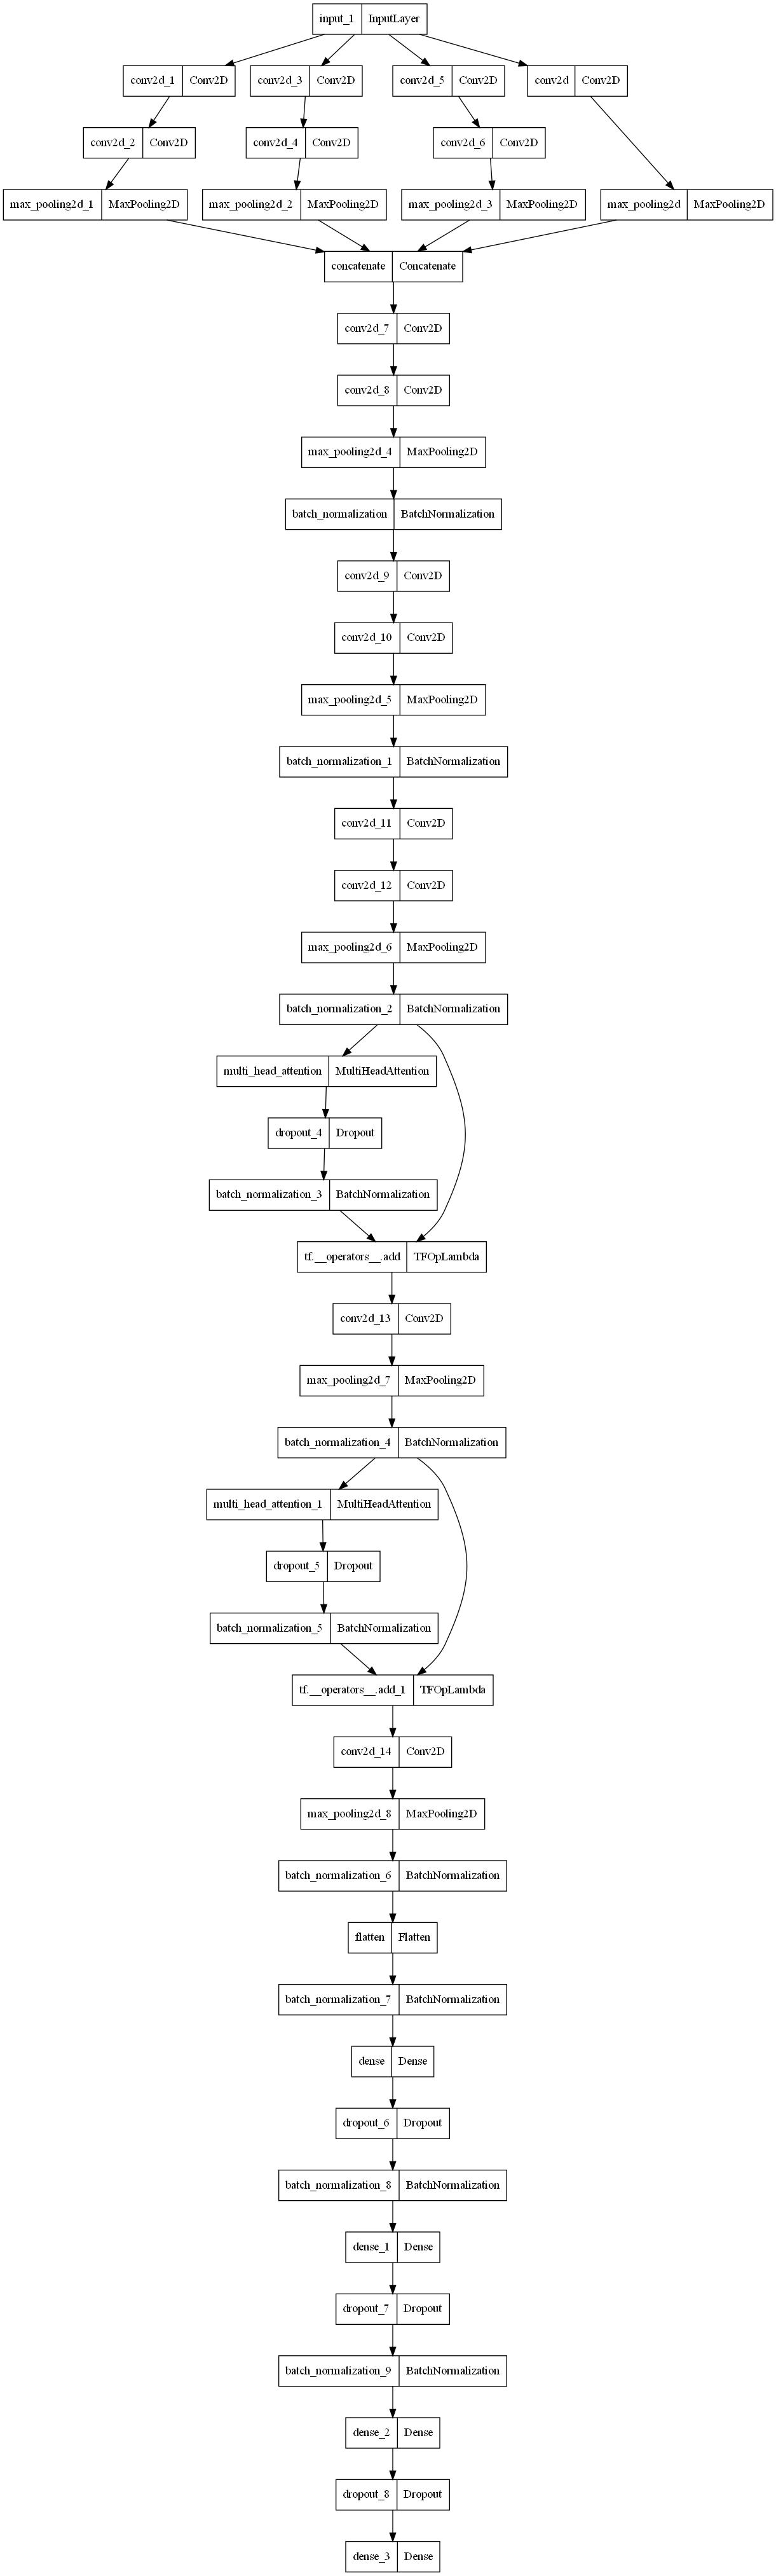

In [8]:
tf.keras.utils.plot_model(maze)

In [5]:
maze.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 150, 150, 32  128         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 150, 150, 32  128         ['input_1[0][0]']                
                                )                                                             

 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_1 (MultiH  (None, 4, 4, 128)   263808      ['batch_normalization_4[0][0]',  
 eadAttention)                                                    'batch_normalization_4[0][0]']  
                                                                                                  
 dropout_1 (Dropout)            (None, 4, 4, 128)    0           ['multi_head_attention_1[0][0]'] 
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 4, 4, 128)   512         ['dropout_1[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 tf.__oper

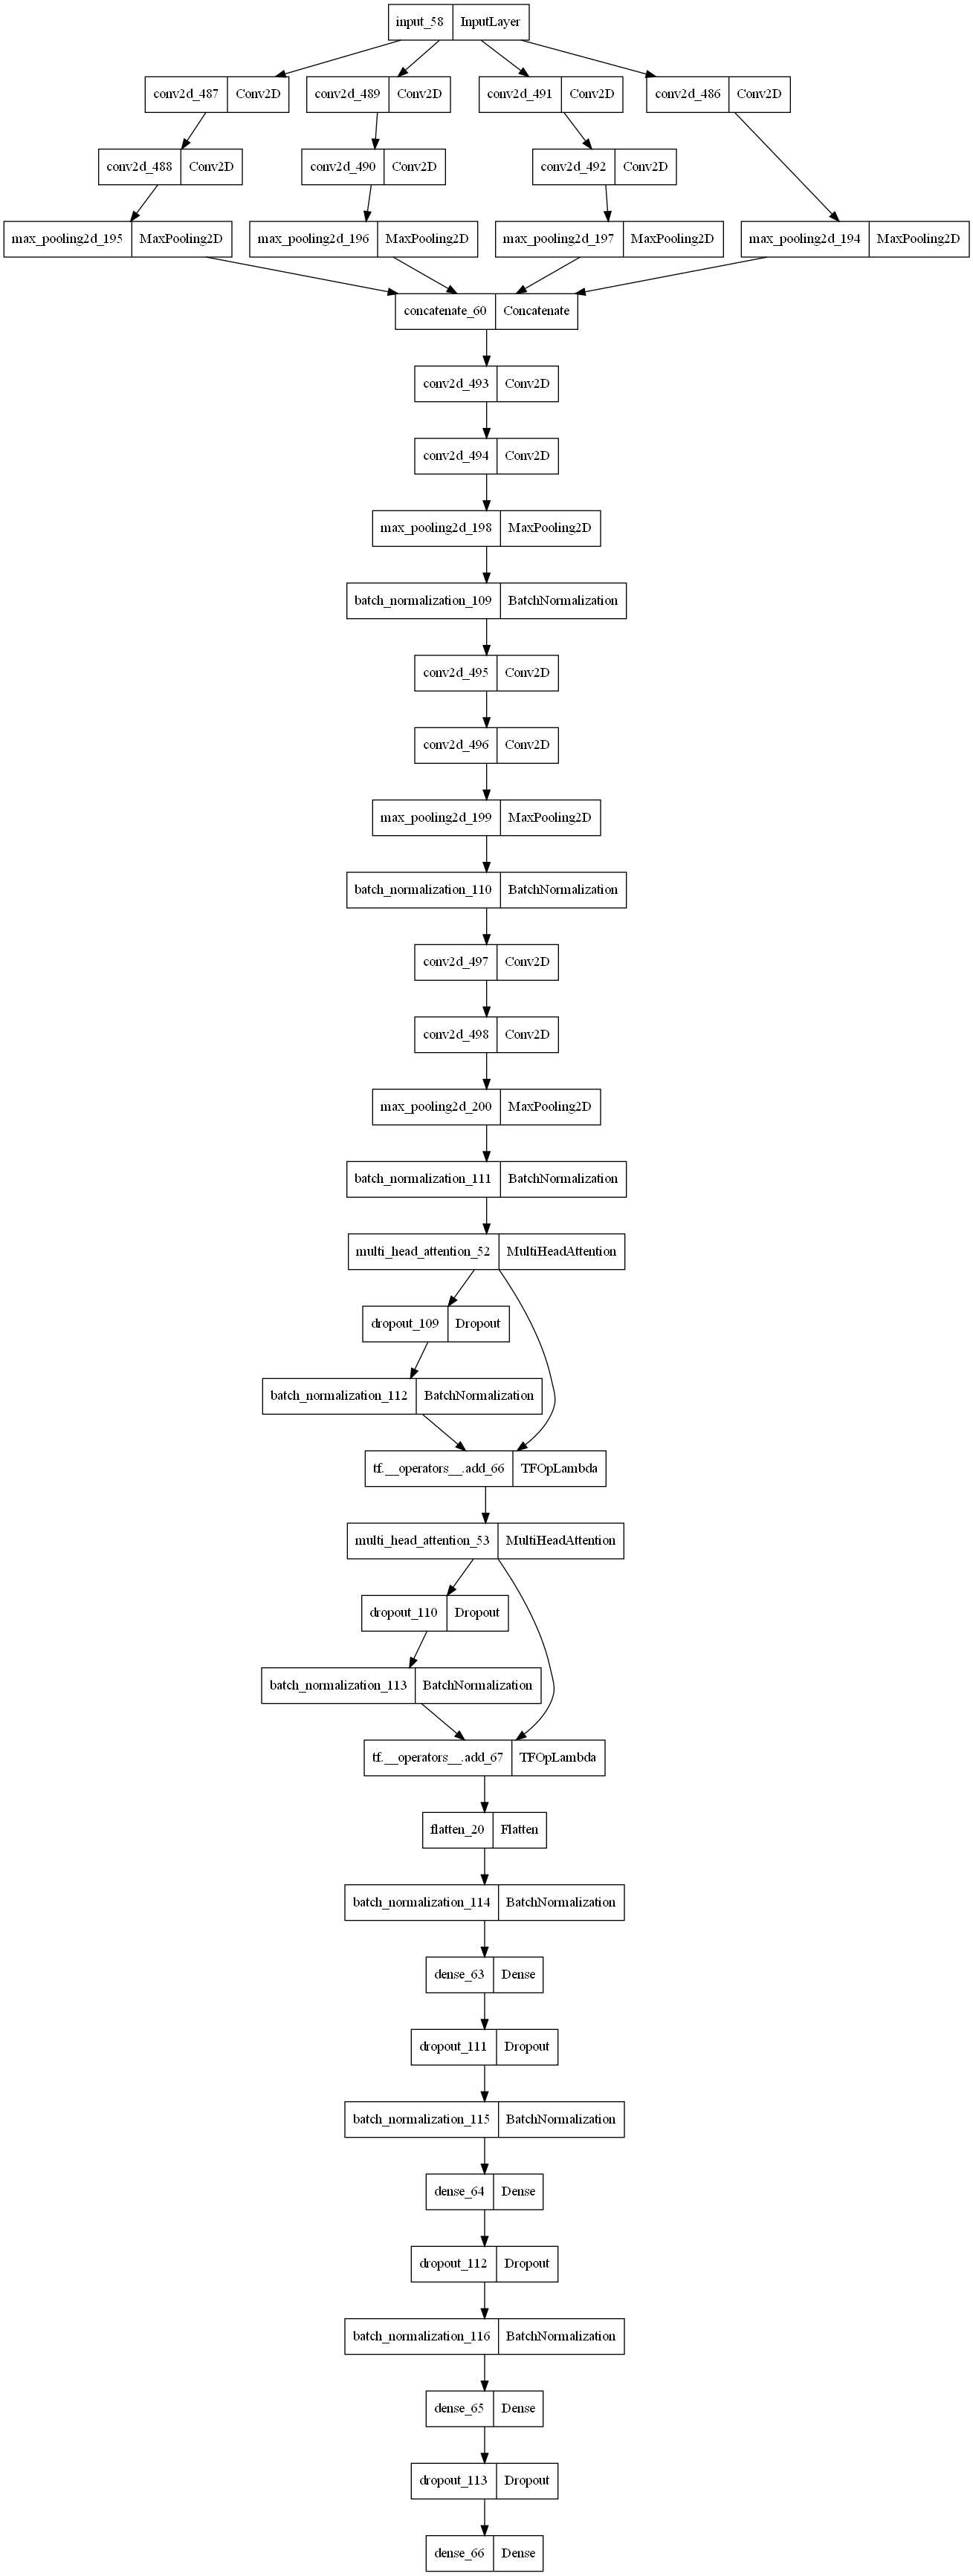

In [92]:
tf.keras.utils.plot_model(maze)

In [127]:
maze.summary()

Model: "model_35"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_73 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_714 (Conv2D)            (None, 150, 150, 32  128         ['input_73[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_716 (Conv2D)            (None, 150, 150, 32  128         ['input_73[0][0]']               
                                )                                                          

 ambda)                                                           'batch_normalization_253[0][0]']
                                                                                                  
 conv2d_726 (Conv2D)            (None, 9, 9, 128)    204928      ['tf.__operators__.add_96[0][0]']
                                                                                                  
 max_pooling2d_334 (MaxPooling2  (None, 4, 4, 128)   0           ['conv2d_726[0][0]']             
 D)                                                                                               
                                                                                                  
 batch_normalization_255 (Batch  (None, 4, 4, 128)   512         ['max_pooling2d_334[0][0]']      
 Normalization)                                                                                   
                                                                                                  
 multi_hea

In [9]:
maze.compile(loss="sparse_categorical_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])




import time
import keras.callbacks as callbacks
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback = TimeHistory()
early_stopping_cb = callbacks.EarlyStopping(patience = 10,restore_best_weights=True,verbose = 1, monitor ="val_accuracy")
checkpoint_cb = callbacks.ModelCheckpoint(r"G:\MSc project\Mazeyarabv3+.h5",save_best_only=True,verbose = 1)

In [10]:
history = maze.fit(
train_gen,
epochs=20,
steps_per_epoch= 152,
validation_data=valid_gen,
validation_steps = 27 ,
callbacks = [checkpoint_cb,early_stopping_cb],verbose = 1)


Epoch 1/20
152/152 [==============================] - ETA: 0s - loss: 1.0340 - accuracy: 0.5775
Epoch 1: val_loss improved from inf to 4.15554, saving model to G:\MSc project\Mazeyarabv3+.h5
152/152 [==============================] - 903s 6s/step - loss: 1.0340 - accuracy: 0.5775 - val_loss: 4.1555 - val_accuracy: 0.3895
Epoch 2/20
152/152 [==============================] - ETA: 0s - loss: 0.7301 - accuracy: 0.7186
Epoch 2: val_loss improved from 4.15554 to 1.42110, saving model to G:\MSc project\Mazeyarabv3+.h5
152/152 [==============================] - 809s 5s/step - loss: 0.7301 - accuracy: 0.7186 - val_loss: 1.4211 - val_accuracy: 0.6035
Epoch 3/20
152/152 [==============================] - ETA: 0s - loss: 0.5914 - accuracy: 0.7838
Epoch 3: val_loss did not improve from 1.42110
152/152 [==============================] - 949s 6s/step - loss: 0.5914 - accuracy: 0.7838 - val_loss: 1.7705 - val_accuracy: 0.6351
Epoch 4/20
152/152 [==============================] - ETA: 0s - loss: 0.501

In [97]:
model = tf.keras.models.load_model(r"G:\MSc project\Mazeyarab.h5")

model.evaluate(Test_gen)

41/41 [==============================] - 36s 853ms/step - loss: 0.4809 - accuracy: 0.8383


[0.4809492528438568, 0.8382914066314697]

In [130]:
model = tf.keras.models.load_model(r"G:\MSc project\Mazeyarabv2.h5")

model.evaluate(Test_gen)

41/41 [==============================] - 63s 2s/step - loss: 0.2686 - accuracy: 0.9115


[0.2686236798763275, 0.9115179181098938]

In [12]:
model = tf.keras.models.load_model(r"G:\MSc project\Mazeyarabv3+.h5")

model.evaluate(Test_gen)

41/41 [==============================] - 33s 785ms/step - loss: 0.2407 - accuracy: 0.9054


[0.24070307612419128, 0.9054157137870789]

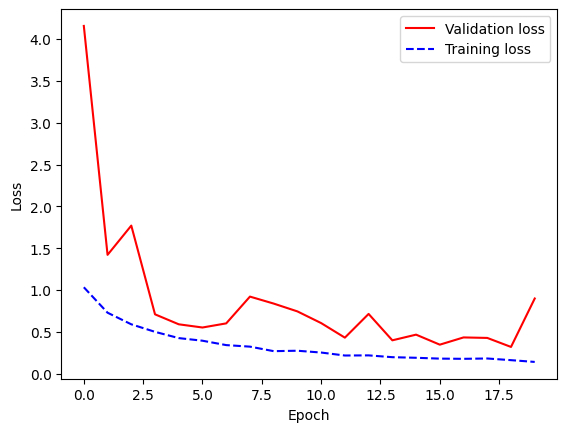

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],'r', label = 'Validation loss')
plt.plot(history.history['loss'],'--b',label = 'Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

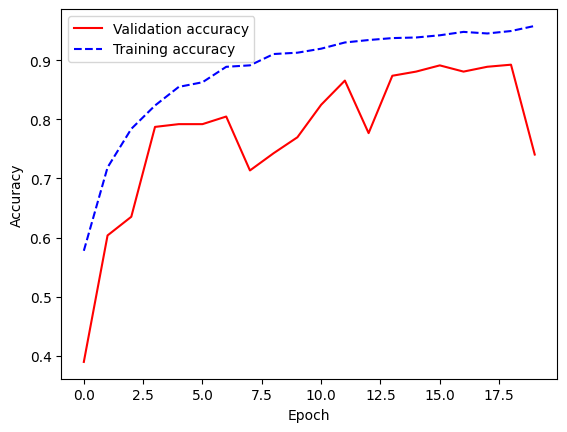

In [21]:
plt.plot(history.history['val_accuracy'],'r', label = 'Validation accuracy')
plt.plot(history.history['accuracy'],'--b',label = 'Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [2]:
import tensorflow as tf

In [9]:
# Strongest model
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(150,150,3))
conv_1 = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(inputs)
conv_1 = layers.MaxPooling2D(2)(conv_1)

conv_2 = layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_2 = layers.Conv2D(32, 7, activation = 'relu' , padding = 'same')(conv_2)
conv_2 = layers.MaxPooling2D(2)(conv_2)

conv_3 = layers.Conv2D(32, 1, activation = 'relu', padding = 'same')(inputs)
conv_3 = layers.Conv2D(32, 5, activation = 'relu', padding = 'same')(conv_3)
conv_3 = layers.MaxPooling2D(2)(conv_3)

conv_4 =  layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_4 = layers.Conv2D(32, 3, activation = 'relu' , padding = 'same')(conv_4)
conv_4 = layers.MaxPooling2D(2)(conv_4)

conc = layers.Concatenate()([conv_1, conv_2, conv_3, conv_4])

conv_m = layers.Conv2D(128, 1, activation = 'relu', padding = 'same')(conc)
conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m_out = conc+conv_m


conv_m = layers.Conv2D(128, 1, activation = 'relu', padding = 'same')(conv_m_out)
conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m = conv_m + conv_m_out

conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)

conv_m = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(conv_m,conv_m)
x = layers.Dropout(0.5)(x_m)
x = layers.BatchNormalization()(x)
x = x +conv_m


x = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D(2)(x)
x_bn1 = layers.BatchNormalization()(x)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(x_bn1,x_bn1)
x = layers.Dropout(0.5)(x_m)
x = layers.BatchNormalization()(x)
x = x +x_bn1


x = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.BatchNormalization()(x)



out_layers = layers.Flatten()(x)
out_layers = layers.BatchNormalization()(out_layers)

out_layers1 = layers.Dense(64, activation = 'relu')(out_layers)
out_layers1 = layers.Dropout(0.4)(out_layers1)
out_layers1 = layers.BatchNormalization()(out_layers1)

out_layers1 = layers.Dense(128, activation = 'relu')(out_layers1)
out_layers1 = layers.Dropout(0.4)(out_layers1)
out_layers1 = layers.BatchNormalization()(out_layers1)

out_layers1 = layers.Dense(256, activation = 'relu')(out_layers1)
out_layers1 = layers.Dropout(0.4)(out_layers1)

out_layers = layers.Dense(4, activation = 'softmax')(out_layers1)

maze = tf.keras.Model(inputs, out_layers)


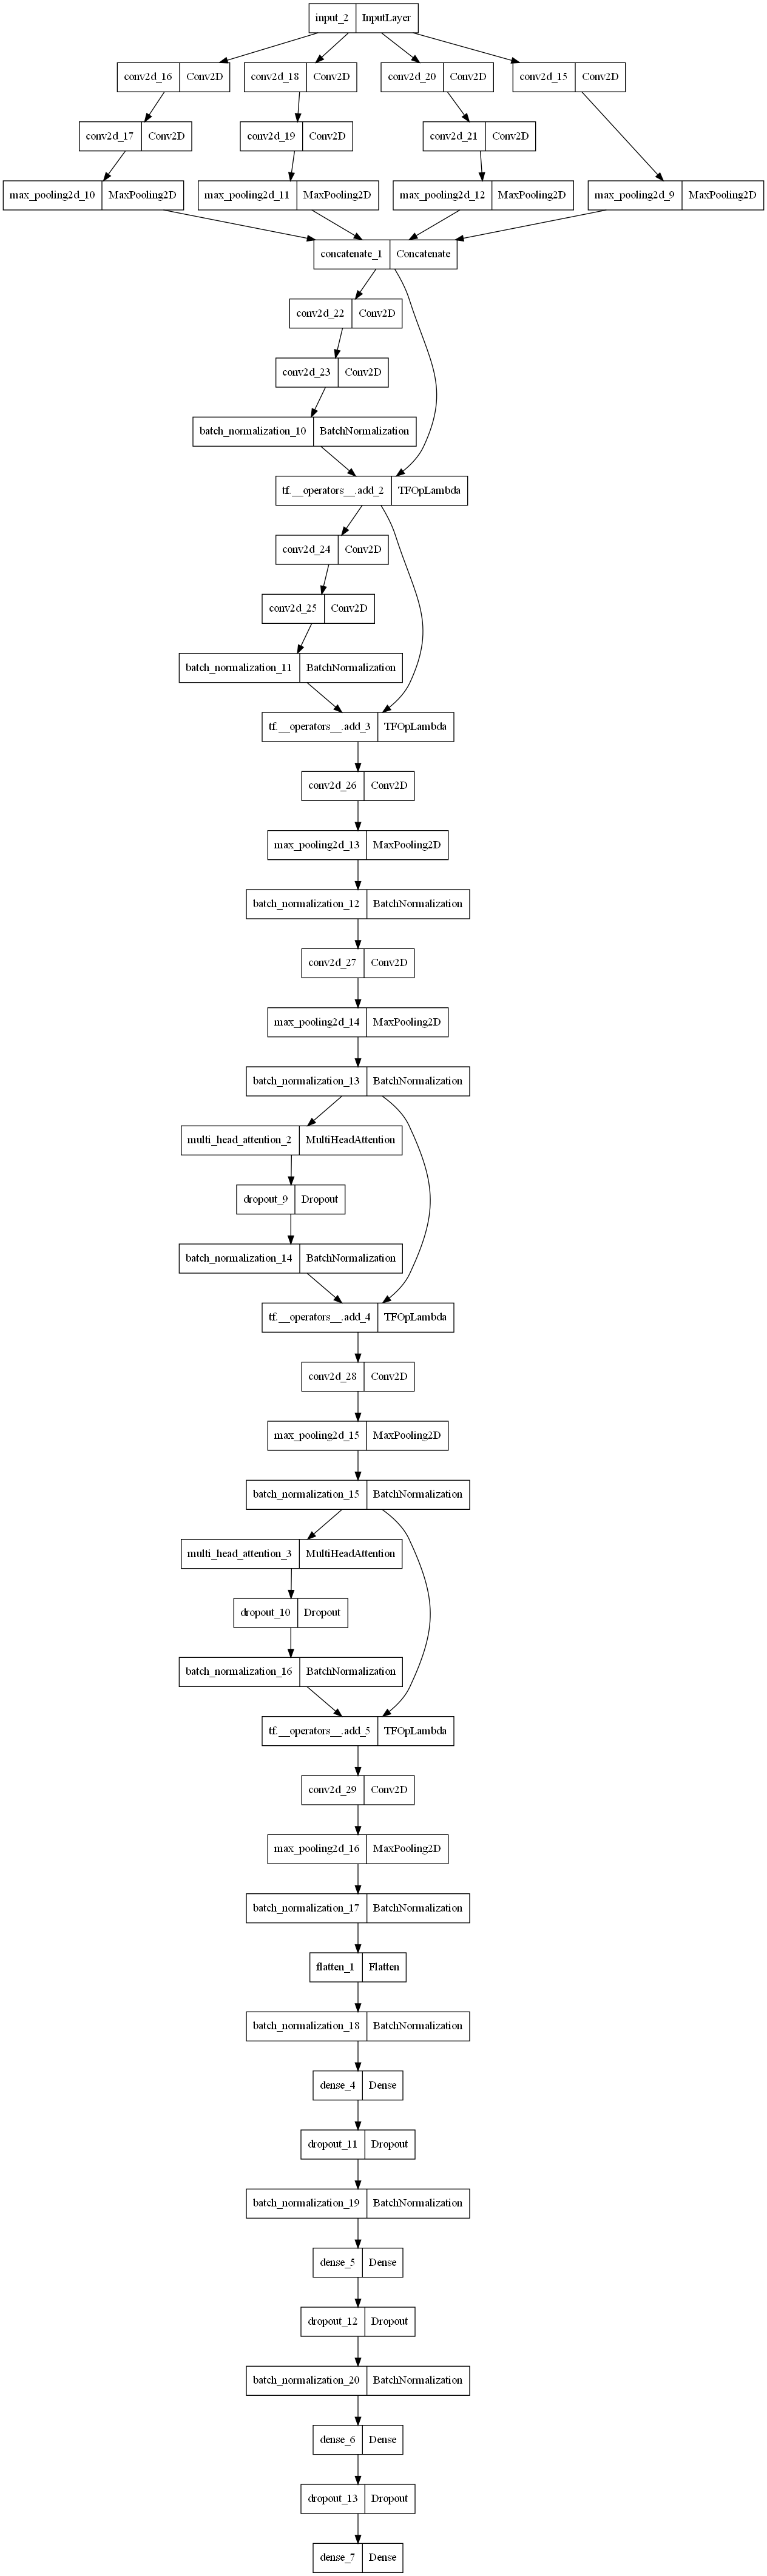

In [10]:
tf.keras.utils.plot_model(maze)

In [15]:
maze.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_108 (Conv2D)            (None, 150, 150, 32  128         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_110 (Conv2D)            (None, 150, 150, 32  128         ['input_10[0][0]']               
                                )                                                           

 dropout_15 (Dropout)           (None, 18, 18, 128)  0           ['multi_head_attention_6[0][0]'] 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 18, 18, 128)  512        ['dropout_15[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 tf.__operators__.add_19 (TFOpL  (None, 18, 18, 128)  0          ['batch_normalization_44[0][0]', 
 ambda)                                                           'batch_normalization_43[0][0]'] 
                                                                                                  
 conv2d_120 (Conv2D)            (None, 18, 18, 128)  409728      ['tf.__operators__.add_19[0][0]']
                                                                                                  
 max_pooli

In [16]:
maze.compile(loss="sparse_categorical_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])




import time
import keras.callbacks as callbacks
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback = TimeHistory()
early_stopping_cb = callbacks.EarlyStopping(patience = 10,restore_best_weights=True,verbose = 1, monitor ="val_accuracy")
checkpoint_cb = callbacks.ModelCheckpoint(r"G:\MSc project\Mazeyarabv4.h5",save_best_only=True,verbose = 1)

In [19]:
history = maze.fit(
train_gen,
epochs=20,
steps_per_epoch= 152,
validation_data=valid_gen,
validation_steps = 27 ,
callbacks = [checkpoint_cb,early_stopping_cb],verbose = 1)


Epoch 1/20
152/152 [==============================] - ETA: 0s - loss: 1.0918 - accuracy: 0.5586
Epoch 1: val_loss improved from inf to 0.98728, saving model to G:\MSc project\Mazeyarabv4.h5
152/152 [==============================] - 1535s 10s/step - loss: 1.0918 - accuracy: 0.5586 - val_loss: 0.9873 - val_accuracy: 0.6222
Epoch 2/20
152/152 [==============================] - ETA: 0s - loss: 0.7979 - accuracy: 0.6930
Epoch 2: val_loss did not improve from 0.98728
152/152 [==============================] - 1420s 9s/step - loss: 0.7979 - accuracy: 0.6930 - val_loss: 1.8259 - val_accuracy: 0.4854
Epoch 3/20
152/152 [==============================] - ETA: 0s - loss: 0.6344 - accuracy: 0.7577
Epoch 3: val_loss did not improve from 0.98728
152/152 [==============================] - 1382s 9s/step - loss: 0.6344 - accuracy: 0.7577 - val_loss: 1.7978 - val_accuracy: 0.4819
Epoch 4/20
152/152 [==============================] - ETA: 0s - loss: 0.5473 - accuracy: 0.7846
Epoch 4: val_loss did not im

In [20]:
model = tf.keras.models.load_model(r"G:\MSc project\Mazeyarabv4.h5")

model.evaluate(Test_gen)

41/41 [==============================] - 71s 2s/step - loss: 0.1717 - accuracy: 0.9405


[0.17173539102077484, 0.9405034184455872]

In [21]:
maze.evaluate(Test_gen)

41/41 [==============================] - 69s 2s/step - loss: 0.1705 - accuracy: 0.9428


[0.17048335075378418, 0.942791759967804]

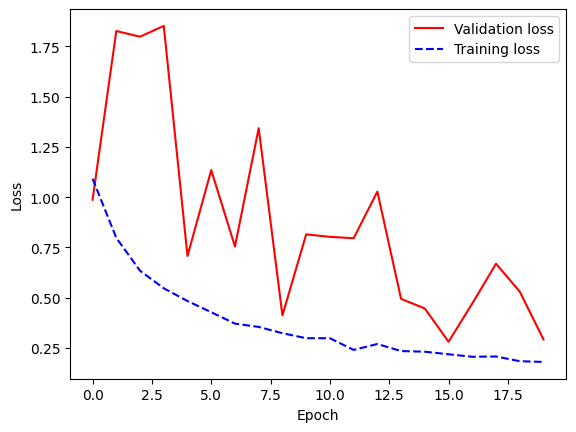

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],'r', label = 'Validation loss')
plt.plot(history.history['loss'],'--b',label = 'Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

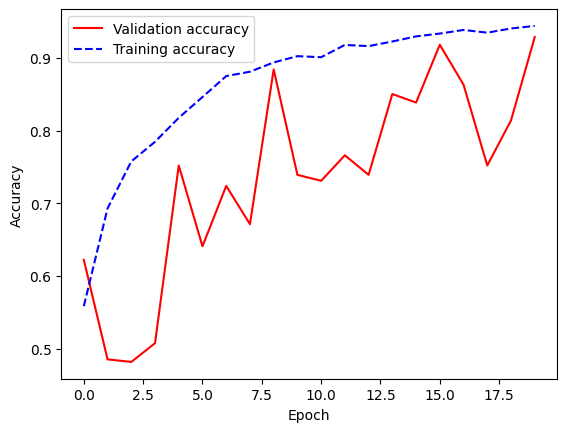

In [23]:
plt.plot(history.history['val_accuracy'],'r', label = 'Validation accuracy')
plt.plot(history.history['accuracy'],'--b',label = 'Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [3]:
maze = tf.keras.models.load_model(r"G:\MSc project\Mazeyarabv4.h5")



In [4]:
maze.compile(loss="sparse_categorical_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])




import time
import keras.callbacks as callbacks
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback = TimeHistory()
early_stopping_cb = callbacks.EarlyStopping(patience = 10,restore_best_weights=True,verbose = 1, monitor ="val_accuracy")
checkpoint_cb = callbacks.ModelCheckpoint(r"G:\MSc project\Mazeyarabv4_again_training.h5",save_best_only=True,verbose = 1)

In [5]:
history = maze.fit(
train_gen,
epochs=20,
steps_per_epoch= 152,
validation_data=valid_gen,
validation_steps = 27 ,
callbacks = [checkpoint_cb,early_stopping_cb],verbose = 1)


Epoch 1/20
152/152 [==============================] - ETA: 0s - loss: 0.2096 - accuracy: 0.9286 
Epoch 1: val_loss improved from inf to 0.30041, saving model to G:\MSc project\Mazeyarabv4_again_training.h5
152/152 [==============================] - 2226s 15s/step - loss: 0.2096 - accuracy: 0.9286 - val_loss: 0.3004 - val_accuracy: 0.9053
Epoch 2/20
152/152 [==============================] - ETA: 0s - loss: 0.1935 - accuracy: 0.9374 
Epoch 2: val_loss improved from 0.30041 to 0.27871, saving model to G:\MSc project\Mazeyarabv4_again_training.h5
152/152 [==============================] - 1724s 11s/step - loss: 0.1935 - accuracy: 0.9374 - val_loss: 0.2787 - val_accuracy: 0.9088
Epoch 3/20
152/152 [==============================] - ETA: 0s - loss: 0.2051 - accuracy: 0.9370 
Epoch 3: val_loss did not improve from 0.27871
152/152 [==============================] - 1751s 12s/step - loss: 0.2051 - accuracy: 0.9370 - val_loss: 1.4472 - val_accuracy: 0.6901
Epoch 4/20
152/152 [==================

In [6]:
model = tf.keras.models.load_model(r"G:\MSc project\Mazeyarabv4_again_training.h5")

model.evaluate(Test_gen)

41/41 [==============================] - 80s 2s/step - loss: 0.1980 - accuracy: 0.9230


[0.19798952341079712, 0.922959566116333]

In [24]:
basemodel = tf.keras.applications. ResNet152V2(
    input_shape  = (150,150,3),
    include_top=False,
    weights='imagenet',
    classes=4)

In [25]:
for layer in basemodel.layers[:-14]:
    print(layer.name)
    layer.trainable = False

input_16
conv1_pad
conv1_conv
pool1_pad
pool1_pool
conv2_block1_preact_bn
conv2_block1_preact_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_pad
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_out
conv2_block2_preact_bn
conv2_block2_preact_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_pad
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_out
conv2_block3_preact_bn
conv2_block3_preact_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_pad
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
max_pooling2d_120
conv2_block3_3_conv
conv2_block3_out
conv3_block1_preact_bn
conv3_block1_preact_relu
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_pad
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_out
conv3_block

In [26]:
basemodel.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_16[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 77, 77, 64)   0           ['conv1_conv[0][0]']   

 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 38, 38, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 38, 38, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 38, 38, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 19, 19, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 19, 19, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_block2_out (Add)         (None, 19, 19, 512)  0           ['conv3_block1_out[0][0]',       
          

 conv3_block5_1_bn (BatchNormal  (None, 19, 19, 128)  512        ['conv3_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block5_2_pad (ZeroPaddin  (None, 21, 21, 128)  0          ['conv3_block5_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv3_block5_2_conv (Conv2D)   (None, 19, 19, 128)  147456      ['conv3_block5_2_pad[0][0]']     
          

                                                                                                  
 conv3_block8_preact_bn (BatchN  (None, 19, 19, 512)  2048       ['conv3_block7_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv3_block8_preact_relu (Acti  (None, 19, 19, 512)  0          ['conv3_block8_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv3_block8_1_conv (Conv2D)   (None, 19, 19, 128)  65536       ['conv3_block8_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv3_blo

 n)                                                                                               
                                                                                                  
 conv4_block2_2_pad (ZeroPaddin  (None, 12, 12, 256)  0          ['conv4_block2_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 10, 10, 256)  589824      ['conv4_block2_2_pad[0][0]']     
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block5_preact_bn (BatchN  (None, 10, 10, 1024  4096       ['conv4_block4_out[0][0]']       
 ormalization)                  )                                                                 
                                                                                                  
 conv4_block5_preact_relu (Acti  (None, 10, 10, 1024  0          ['conv4_block5_preact_bn[0][0]'] 
 vation)                        )                                                                 
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 10, 10, 256)  262144      ['conv4_block5_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block7_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block7_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block7_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_3_conv (Conv2D)   (None, 10, 10, 1024  263168      ['conv4_block7_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_blo

 conv4_block10_1_conv (Conv2D)  (None, 10, 10, 256)  262144      ['conv4_block10_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block10_1_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block10_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_1_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block10_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block10_2_pad (ZeroPaddi  (None, 12, 12, 256)  0          ['conv4_block10_1_relu[0][0]']   
 ng2D)    

                                                                                                  
 conv4_block12_3_conv (Conv2D)  (None, 10, 10, 1024  263168      ['conv4_block12_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block12_out (Add)        (None, 10, 10, 1024  0           ['conv4_block11_out[0][0]',      
                                )                                 'conv4_block12_3_conv[0][0]']   
                                                                                                  
 conv4_block13_preact_bn (Batch  (None, 10, 10, 1024  4096       ['conv4_block12_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_blo

 conv4_block15_1_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block15_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block15_2_pad (ZeroPaddi  (None, 12, 12, 256)  0          ['conv4_block15_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block15_2_conv (Conv2D)  (None, 10, 10, 256)  589824      ['conv4_block15_2_pad[0][0]']    
                                                                                                  
 conv4_block15_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block15_2_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block18_preact_bn (Batch  (None, 10, 10, 1024  4096       ['conv4_block17_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block18_preact_relu (Act  (None, 10, 10, 1024  0          ['conv4_block18_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block18_1_conv (Conv2D)  (None, 10, 10, 256)  262144      ['conv4_block18_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_blo

 conv4_block20_2_conv (Conv2D)  (None, 10, 10, 256)  589824      ['conv4_block20_2_pad[0][0]']    
                                                                                                  
 conv4_block20_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block20_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_2_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block20_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_3_conv (Conv2D)  (None, 10, 10, 1024  263168      ['conv4_block20_2_relu[0][0]']   
                                )                                                                 
          

                                                                                                  
 conv4_block23_1_conv (Conv2D)  (None, 10, 10, 256)  262144      ['conv4_block23_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block23_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block23_1_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block23_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 on)                                                                                              
                                                                                                  
 conv4_block25_3_conv (Conv2D)  (None, 10, 10, 1024  263168      ['conv4_block25_2_relu[0][0]']   
                                )                                                                 
                                                                                                  
 conv4_block25_out (Add)        (None, 10, 10, 1024  0           ['conv4_block24_out[0][0]',      
                                )                                 'conv4_block25_3_conv[0][0]']   
                                                                                                  
 conv4_block26_preact_bn (Batch  (None, 10, 10, 1024  4096       ['conv4_block25_out[0][0]']      
 Normalization)                 )                                                                 
          

                                                                                                  
 conv4_block28_1_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block28_2_pad (ZeroPaddi  (None, 12, 12, 256)  0          ['conv4_block28_1_relu[0][0]']   
 ng2D)                                                                                            
                                                                                                  
 conv4_block28_2_conv (Conv2D)  (None, 10, 10, 256)  589824      ['conv4_block28_2_pad[0][0]']    
                                                                                                  
 conv4_block28_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block28_2_conv[0][0]']   
 lization)

                                )                                 'conv4_block30_3_conv[0][0]']   
                                                                                                  
 conv4_block31_preact_bn (Batch  (None, 10, 10, 1024  4096       ['conv4_block30_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block31_preact_relu (Act  (None, 10, 10, 1024  0          ['conv4_block31_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block31_1_conv (Conv2D)  (None, 10, 10, 256)  262144      ['conv4_block31_preact_relu[0][0]
                                                                 ']                               
          

                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 10, 10, 256)  589824      ['conv4_block33_2_pad[0][0]']    
                                                                                                  
 conv4_block33_2_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block33_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_2_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block33_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_3_conv (Conv2D)  (None, 10, 10, 1024  263168      ['conv4_block33_2_relu[0][0]']   
          

 ivation)                       )                                                                 
                                                                                                  
 conv4_block36_1_conv (Conv2D)  (None, 10, 10, 256)  262144      ['conv4_block36_preact_relu[0][0]
                                                                 ']                               
                                                                                                  
 conv4_block36_1_bn (BatchNorma  (None, 10, 10, 256)  1024       ['conv4_block36_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block36_1_relu (Activati  (None, 10, 10, 256)  0          ['conv4_block36_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv5_block2_2_bn (BatchNormal  (None, 5, 5, 512)   2048        ['conv5_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 5, 5, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 5, 5, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 5, 5, 2048)   0           ['conv5_block1_out[0][0]',       
          

In [44]:
# Strongest model
from tensorflow.keras import layers




inputs = tf.keras.Input(shape=(150,150,3))

res = basemodel(inputs)









conv_1 = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(inputs)
conv_1 = layers.MaxPooling2D(2)(conv_1)

conv_2 = layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_2 = layers.Conv2D(32, 7, activation = 'relu' , padding = 'same')(conv_2)
conv_2 = layers.MaxPooling2D(2)(conv_2)

conv_3 = layers.Conv2D(32, 1, activation = 'relu', padding = 'same')(inputs)
conv_3 = layers.Conv2D(32, 5, activation = 'relu', padding = 'same')(conv_3)
conv_3 = layers.MaxPooling2D(2)(conv_3)

conv_4 =  layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_4 = layers.Conv2D(32, 3, activation = 'relu' , padding = 'same')(conv_4)
conv_4 = layers.MaxPooling2D(2)(conv_4)

conc = layers.Concatenate()([conv_1, conv_2, conv_3, conv_4])

conv_m = layers.Conv2D(128, 1, activation = 'relu', padding = 'same')(conc)
conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m_out = conc+conv_m


conv_m = layers.Conv2D(128, 1, activation = 'relu', padding = 'same')(conv_m_out)
conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m = conv_m + conv_m_out

conv_m = layers.Conv2D(256, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)

conv_m = layers.Conv2D(512, 5, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(conv_m,conv_m)
x = layers.Dropout(0.5)(x_m)
x = layers.BatchNormalization()(x)
x = x +conv_m


x = layers.Conv2D(1024, 5, activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D(2)(x)
x_bn1 = layers.BatchNormalization()(x)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(x_bn1,x_bn1)
x = layers.Dropout(0.5)(x_m)
x = layers.BatchNormalization()(x)
x = x +x_bn1


x = layers.Conv2D(2048, 5, activation = 'relu')(x)
# x = layers.MaxPooling2D(2)(x)
x = layers.BatchNormalization()(x)

x = x+ res

out_layers = layers.Flatten()(x)
out_layers = layers.BatchNormalization()(out_layers)

out_layers1 = layers.Dense(64, activation = 'relu')(out_layers)
out_layers1 = layers.Dropout(0.4)(out_layers1)
out_layers1 = layers.BatchNormalization()(out_layers1)

out_layers1 = layers.Dense(128, activation = 'relu')(out_layers1)
out_layers1 = layers.Dropout(0.4)(out_layers1)
out_layers1 = layers.BatchNormalization()(out_layers1)

out_layers1 = layers.Dense(256, activation = 'relu')(out_layers1)
out_layers1 = layers.Dropout(0.4)(out_layers1)

out_layers = layers.Dense(4, activation = 'softmax')(out_layers1)

maze = tf.keras.Model(inputs, out_layers)


# Best merging models

In [65]:
# Strongest model
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(150,150,3))



res = basemodel(inputs)
# res = layers.Conv2D(128, 5, activation = 'relu')(res)
# res = layers.MaxPooling2D(2)(res)
# res = layers.BatchNormalization()(res)



conv_1 = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(inputs)
conv_1 = layers.MaxPooling2D(2)(conv_1)

conv_2 = layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_2 = layers.Conv2D(32, 7, activation = 'relu' , padding = 'same')(conv_2)
conv_2 = layers.MaxPooling2D(2)(conv_2)

conv_3 = layers.Conv2D(32, 1, activation = 'relu', padding = 'same')(inputs)
conv_3 = layers.Conv2D(32, 5, activation = 'relu', padding = 'same')(conv_3)
conv_3 = layers.MaxPooling2D(2)(conv_3)

conv_4 =  layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_4 = layers.Conv2D(32, 3, activation = 'relu' , padding = 'same')(conv_4)
conv_4 = layers.MaxPooling2D(2)(conv_4)

conc = layers.Concatenate()([conv_1, conv_2, conv_3, conv_4])

conv_m = layers.Conv2D(128, 1, activation = 'relu', padding = 'same')(conc)
conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m_out = conc+conv_m


conv_m = layers.Conv2D(128, 1, activation = 'relu', padding = 'same')(conv_m_out)
conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m = conv_m + conv_m_out

conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)

conv_m = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(conv_m,conv_m)
x = layers.Dropout(0.4)(x_m)
x = layers.BatchNormalization()(x)
x = x +conv_m


x = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D(2)(x)
x_bn1 = layers.BatchNormalization()(x)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(x_bn1,x_bn1)
x = layers.Dropout(0.4)(x_m)
x = layers.BatchNormalization()(x)
x = x +x_bn1


x = layers.Conv2D(256, 5, activation = 'relu')(x)
x = layers.BatchNormalization()(x)

x =  layers.Concatenate()([x, res])
# x = x+res



out_layers = layers.Flatten()(x)
out_layers = layers.BatchNormalization()(out_layers)

out_layers1 = layers.Dense(128, activation = 'relu')(out_layers)
out_layers1 = layers.Dropout(0.4)(out_layers1)
out_layers1 = layers.BatchNormalization()(out_layers1)

out_layers1 = layers.Dense(256, activation = 'relu')(out_layers1)
out_layers1 = layers.Dropout(0.4)(out_layers1)
out_layers1 = layers.BatchNormalization()(out_layers1)

out_layers1 = layers.Dense(512, activation = 'relu')(out_layers1)
out_layers1 = layers.Dropout(0.4)(out_layers1)

out_layers = layers.Dense(4, activation = 'softmax')(out_layers1)

maze = tf.keras.Model(inputs, out_layers)


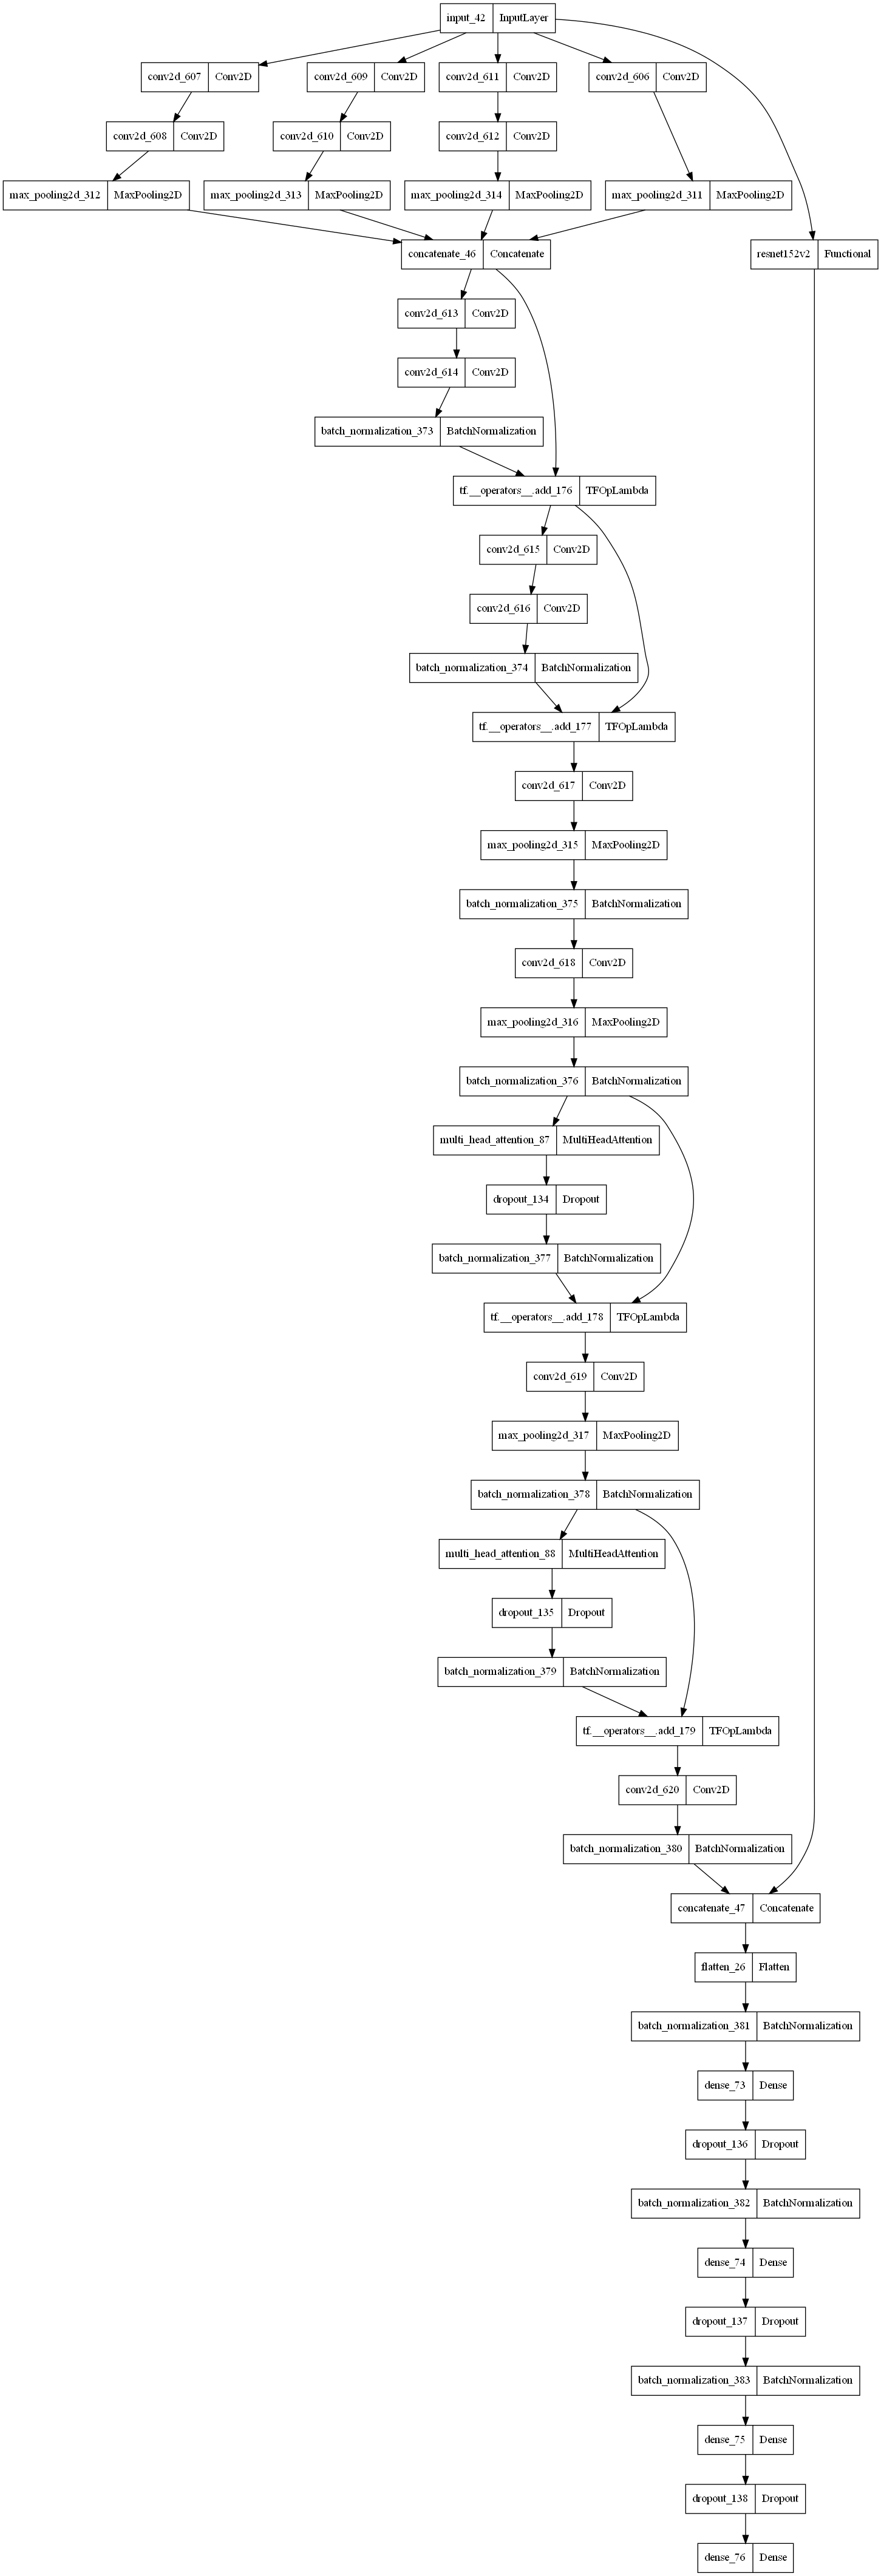

In [66]:
tf.keras.utils.plot_model(maze)

In [67]:
maze.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_42 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_607 (Conv2D)            (None, 150, 150, 32  128         ['input_42[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_609 (Conv2D)            (None, 150, 150, 32  128         ['input_42[0][0]']               
                                )                                                          

 multi_head_attention_87 (Multi  (None, 18, 18, 128)  263808     ['batch_normalization_376[0][0]',
 HeadAttention)                                                   'batch_normalization_376[0][0]']
                                                                                                  
 dropout_134 (Dropout)          (None, 18, 18, 128)  0           ['multi_head_attention_87[0][0]']
                                                                                                  
 batch_normalization_377 (Batch  (None, 18, 18, 128)  512        ['dropout_134[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 tf.__operators__.add_178 (TFOp  (None, 18, 18, 128)  0          ['batch_normalization_377[0][0]',
 Lambda)                                                          'batch_normalization_376[0][0]']
          

In [68]:
maze.compile(loss="sparse_categorical_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])




import time
import keras.callbacks as callbacks
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback = TimeHistory()
early_stopping_cb = callbacks.EarlyStopping(patience = 10,restore_best_weights=True,verbose = 1, monitor ="val_accuracy")
checkpoint_cb = callbacks.ModelCheckpoint(r"G:\MSc project\Mazemorelayer.h5",save_best_only=True,verbose = 1)

In [69]:
history = maze.fit(
train_gen,
epochs=20,
steps_per_epoch= 152,
validation_data=valid_gen,
validation_steps = 27 ,
callbacks = [checkpoint_cb,early_stopping_cb],verbose = 1)


Epoch 1/20
152/152 [==============================] - ETA: 0s - loss: 0.4691 - accuracy: 0.8433 
Epoch 1: val_loss improved from inf to 1.06007, saving model to G:\MSc project\Mazemorelayer.h5
152/152 [==============================] - 1936s 13s/step - loss: 0.4691 - accuracy: 0.8433 - val_loss: 1.0601 - val_accuracy: 0.7789
Epoch 2/20
152/152 [==============================] - ETA: 0s - loss: 0.3188 - accuracy: 0.9006 
Epoch 2: val_loss did not improve from 1.06007
152/152 [==============================] - 1976s 13s/step - loss: 0.3188 - accuracy: 0.9006 - val_loss: 1.4158 - val_accuracy: 0.7404
Epoch 3/20
152/152 [==============================] - ETA: 0s - loss: 0.2684 - accuracy: 0.9141 
Epoch 3: val_loss improved from 1.06007 to 0.85231, saving model to G:\MSc project\Mazemorelayer.h5
152/152 [==============================] - 2130s 14s/step - loss: 0.2684 - accuracy: 0.9141 - val_loss: 0.8523 - val_accuracy: 0.7789
Epoch 4/20
152/152 [==============================] - ETA: 0s - 

In [70]:
model = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayer.h5")

model.evaluate(Test_gen)

41/41 [==============================] - 225s 5s/step - loss: 0.1664 - accuracy: 0.9504


[0.16636304557323456, 0.950419545173645]

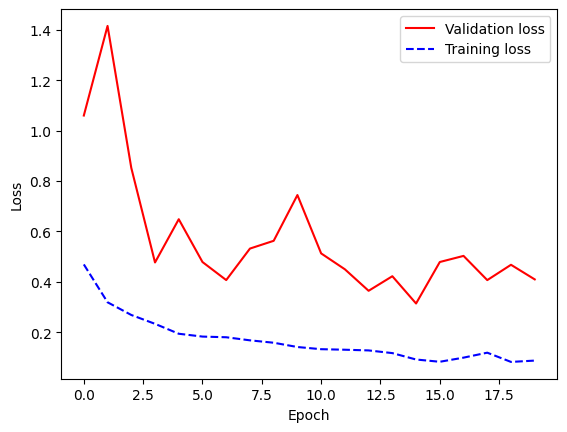

In [76]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],'r', label = 'Validation loss')
plt.plot(history.history['loss'],'--b',label = 'Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

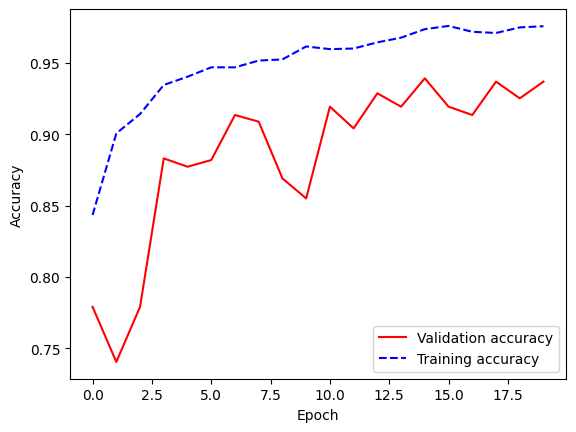

In [77]:
plt.plot(history.history['val_accuracy'],'r', label = 'Validation accuracy')
plt.plot(history.history['accuracy'],'--b',label = 'Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [3]:
basemodel = tf.keras.applications. ResNet152V2(
    input_shape  = (150,150,3),
    include_top=False,
    weights='imagenet',
    classes=4)

In [6]:
for layer in basemodel.layers[:-14]:
    print(layer.name)
    layer.trainable = False

input_1
conv1_pad
conv1_conv
pool1_pad
pool1_pool
conv2_block1_preact_bn
conv2_block1_preact_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_pad
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_out
conv2_block2_preact_bn
conv2_block2_preact_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_pad
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_out
conv2_block3_preact_bn
conv2_block3_preact_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_pad
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
max_pooling2d
conv2_block3_3_conv
conv2_block3_out
conv3_block1_preact_bn
conv3_block1_preact_relu
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_pad
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_out
conv3_block2_pre

In [10]:
# Strongest model
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(150,150,3))



res = basemodel(inputs)
# res = layers.Conv2D(128, 5, activation = 'relu')(res)
# res = layers.MaxPooling2D(2)(res)
# res = layers.BatchNormalization()(res)



conv_1 = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(inputs)
conv_1 = layers.MaxPooling2D(2)(conv_1)

conv_2 = layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_2 = layers.Conv2D(32, 7, activation = 'relu' , padding = 'same')(conv_2)
conv_2 = layers.MaxPooling2D(2)(conv_2)

conv_3 = layers.Conv2D(32, 1, activation = 'relu', padding = 'same')(inputs)
conv_3 = layers.Conv2D(32, 5, activation = 'relu', padding = 'same')(conv_3)
conv_3 = layers.MaxPooling2D(2)(conv_3)

conv_4 =  layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_4 = layers.Conv2D(32, 3, activation = 'relu' , padding = 'same')(conv_4)
conv_4 = layers.MaxPooling2D(2)(conv_4)

conc = layers.Concatenate()([conv_1, conv_2, conv_3, conv_4])

conv_m = layers.Conv2D(128, 1, activation = 'relu', padding = 'same')(conc)
conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m_out = conc+conv_m


conv_m = layers.Conv2D(128, 1, activation = 'relu', padding = 'same')(conv_m_out)
conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m = conv_m + conv_m_out

conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)

conv_m = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(conv_m,conv_m)
x = layers.Dropout(0.4)(x_m)
x = layers.BatchNormalization()(x)
x = x +conv_m


x = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D(2)(x)
x_bn1 = layers.BatchNormalization()(x)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(x_bn1,x_bn1)
x = layers.Dropout(0.4)(x_m)
x = layers.BatchNormalization()(x)
x = x +x_bn1


x = layers.Conv2D(256, 5, activation = 'relu')(x)
x = layers.BatchNormalization()(x)

x =  layers.Concatenate()([x, res])
# x = x+res



out_layers = layers.Flatten()(x)
out_layers = layers.BatchNormalization()(out_layers)

out_layers1 = layers.Dense(128, activation = 'relu')(out_layers)
out_layers1 = layers.Dropout(0.4)(out_layers1)
out_layers1 = layers.BatchNormalization()(out_layers1)

out_layers1 = layers.Dense(256, activation = 'relu')(out_layers1)
out_layers1 = layers.Dropout(0.4)(out_layers1)
out_layers1 = layers.BatchNormalization()(out_layers1)

out_layers1 = layers.Dense(512, activation = 'relu')(out_layers1)
out_layers1 = layers.Dropout(0.4)(out_layers1)



out_layers = layers.Dense(4, activation = 'softmax')(out_layers1)

maze = tf.keras.Model(inputs, out_layers)


In [11]:
maze.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_31 (Conv2D)             (None, 150, 150, 32  128         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_33 (Conv2D)             (None, 150, 150, 32  128         ['input_4[0][0]']                
                                )                                                           

 dropout_10 (Dropout)           (None, 18, 18, 128)  0           ['multi_head_attention_4[0][0]'] 
                                                                                                  
 batch_normalization_26 (BatchN  (None, 18, 18, 128)  512        ['dropout_10[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 tf.__operators__.add_10 (TFOpL  (None, 18, 18, 128)  0          ['batch_normalization_26[0][0]', 
 ambda)                                                           'batch_normalization_25[0][0]'] 
                                                                                                  
 conv2d_43 (Conv2D)             (None, 18, 18, 128)  409728      ['tf.__operators__.add_10[0][0]']
                                                                                                  
 max_pooli

In [12]:
maze.compile(loss="sparse_categorical_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])




import time
import keras.callbacks as callbacks
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback = TimeHistory()
early_stopping_cb = callbacks.EarlyStopping(patience = 10,restore_best_weights=True,verbose = 1, monitor ="val_accuracy")
checkpoint_cb = callbacks.ModelCheckpoint(r"G:\MSc project\Mazemorelayerv2.h5",save_best_only=True,verbose = 1)

In [13]:
history = maze.fit(
train_gen,
epochs= 40,
steps_per_epoch= 152,
validation_data=valid_gen,
validation_steps = 27 ,
callbacks = [checkpoint_cb,early_stopping_cb],verbose = 1)


Epoch 1/40
152/152 [==============================] - ETA: 0s - loss: 0.6377 - accuracy: 0.7721 
Epoch 1: val_loss improved from inf to 1.38555, saving model to G:\MSc project\Mazemorelayerv2.h5
152/152 [==============================] - 1851s 12s/step - loss: 0.6377 - accuracy: 0.7721 - val_loss: 1.3855 - val_accuracy: 0.7626
Epoch 2/40
152/152 [==============================] - ETA: 0s - loss: 0.3746 - accuracy: 0.8765 
Epoch 2: val_loss did not improve from 1.38555
152/152 [==============================] - 1748s 12s/step - loss: 0.3746 - accuracy: 0.8765 - val_loss: 2.5078 - val_accuracy: 0.7380
Epoch 3/40
152/152 [==============================] - ETA: 0s - loss: 0.2994 - accuracy: 0.9016 
Epoch 3: val_loss did not improve from 1.38555
152/152 [==============================] - 1730s 11s/step - loss: 0.2994 - accuracy: 0.9016 - val_loss: 2.8072 - val_accuracy: 0.6596
Epoch 4/40
152/152 [==============================] - ETA: 0s - loss: 0.2523 - accuracy: 0.9191 
Epoch 4: val_loss 

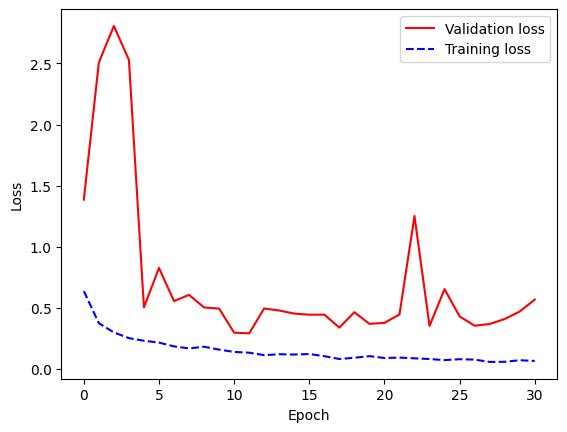

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'],'r', label = 'Validation loss')
plt.plot(history.history['loss'],'--b',label = 'Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

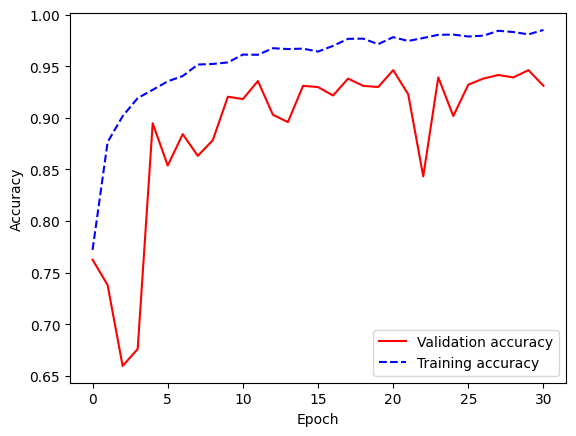

In [15]:
plt.plot(history.history['val_accuracy'],'r', label = 'Validation accuracy')
plt.plot(history.history['accuracy'],'--b',label = 'Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [16]:
model = tf.keras.models.load_model(r"G:\MSc project\Mazemorelayerv2.h5")

model.evaluate(Test_gen)

41/41 [==============================] - 155s 4s/step - loss: 0.1433 - accuracy: 0.9550


[0.14333954453468323, 0.9549961686134338]

In [17]:
maze.evaluate(Test_gen)

41/41 [==============================] - 146s 4s/step - loss: 0.2118 - accuracy: 0.9565


[0.21183067560195923, 0.95652174949646]

In [6]:
basemodel = tf.keras.applications. ResNet152V2(
    input_shape  = (150,150,3),
    include_top=False,
    weights='imagenet',
    classes=4)

for layer in basemodel.layers[:-14]:
    print(layer.name)
    layer.trainable = False





input_3
conv1_pad
conv1_conv
pool1_pad
pool1_pool
conv2_block1_preact_bn
conv2_block1_preact_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_pad
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_out
conv2_block2_preact_bn
conv2_block2_preact_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_pad
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_out
conv2_block3_preact_bn
conv2_block3_preact_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_pad
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
max_pooling2d_10
conv2_block3_3_conv
conv2_block3_out
conv3_block1_preact_bn
conv3_block1_preact_relu
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_pad
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_out
conv3_block2_

In [32]:
# Strongest model
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(150,150,3))



res = basemodel(inputs)
# res = layers.Conv2D(128, 5, activation = 'relu')(res)
# res = layers.MaxPooling2D(2)(res)
# res = layers.BatchNormalization()(res)



conv_1 = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(inputs)
conv_1 = layers.MaxPooling2D(2)(conv_1)

conv_2 = layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_2 = layers.Conv2D(32, 7, activation = 'relu' , padding = 'same')(conv_2)
conv_2 = layers.MaxPooling2D(2)(conv_2)

conv_3 = layers.Conv2D(32, 1, activation = 'relu', padding = 'same')(inputs)
conv_3 = layers.Conv2D(32, 5, activation = 'relu', padding = 'same')(conv_3)
conv_3 = layers.MaxPooling2D(2)(conv_3)

conv_4 =  layers.Conv2D(32,1,activation = 'relu', padding = 'same')(inputs)
conv_4 = layers.Conv2D(32, 3, activation = 'relu' , padding = 'same')(conv_4)
conv_4 = layers.MaxPooling2D(2)(conv_4)

conc = layers.Concatenate()([conv_1, conv_2, conv_3, conv_4])

conv_m = layers.Conv2D(128, 1, activation = 'relu', padding = 'same')(conc)
conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m_out = conc+conv_m


conv_m = layers.Conv2D(128, 1, activation = 'relu', padding = 'same')(conv_m_out)
conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.BatchNormalization()(conv_m)
conv_m = conv_m + conv_m_out

conv_m = layers.Conv2D(128, 3, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)

conv_m = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(conv_m)
conv_m = layers.MaxPooling2D(2)(conv_m)
conv_m = layers.BatchNormalization()(conv_m)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(conv_m,conv_m)
x = layers.Dropout(0.4)(x_m)
x = layers.BatchNormalization()(x)
x = x +conv_m


x = layers.Conv2D(128, 5, activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D(2)(x)
x_bn1 = layers.BatchNormalization()(x)


x_m = layers.MultiHeadAttention(key_dim= 64, num_heads=8, dropout=0.3)(x_bn1,x_bn1)
x = layers.Dropout(0.4)(x_m)
x = layers.BatchNormalization()(x)
x = x +x_bn1


x = layers.Conv2D(256, 5, activation = 'relu')(x)
x = layers.BatchNormalization()(x)

x =  layers.Concatenate()([x, res])
# x = x+res



out_layers = layers.Flatten()(x)
out_layers = layers.BatchNormalization()(out_layers)

out_layers1_1 = layers.Dense(256, activation = 'relu')(out_layers)
out_layers1_1 = layers.Dropout(0.4)(out_layers1_1)
out_layers1_1 = layers.BatchNormalization()(out_layers1_1)

out_layers1_2 = layers.Dense(256, activation = 'relu')(out_layers1_1)
out_layers1_2 = layers.Dropout(0.4)(out_layers1_2)
out_layers1_2 = layers.BatchNormalization()(out_layers1_2)




out_layers1 = layers.Dense(256, activation = 'relu')(out_layers1_2)
out_layers1 = layers.Dropout(0.4)(out_layers1)

out_layers1 = out_layers1+out_layers1_1

out_layers = layers.Dense(4, activation = 'softmax')(out_layers1)

maze = tf.keras.Model(inputs, out_layers)


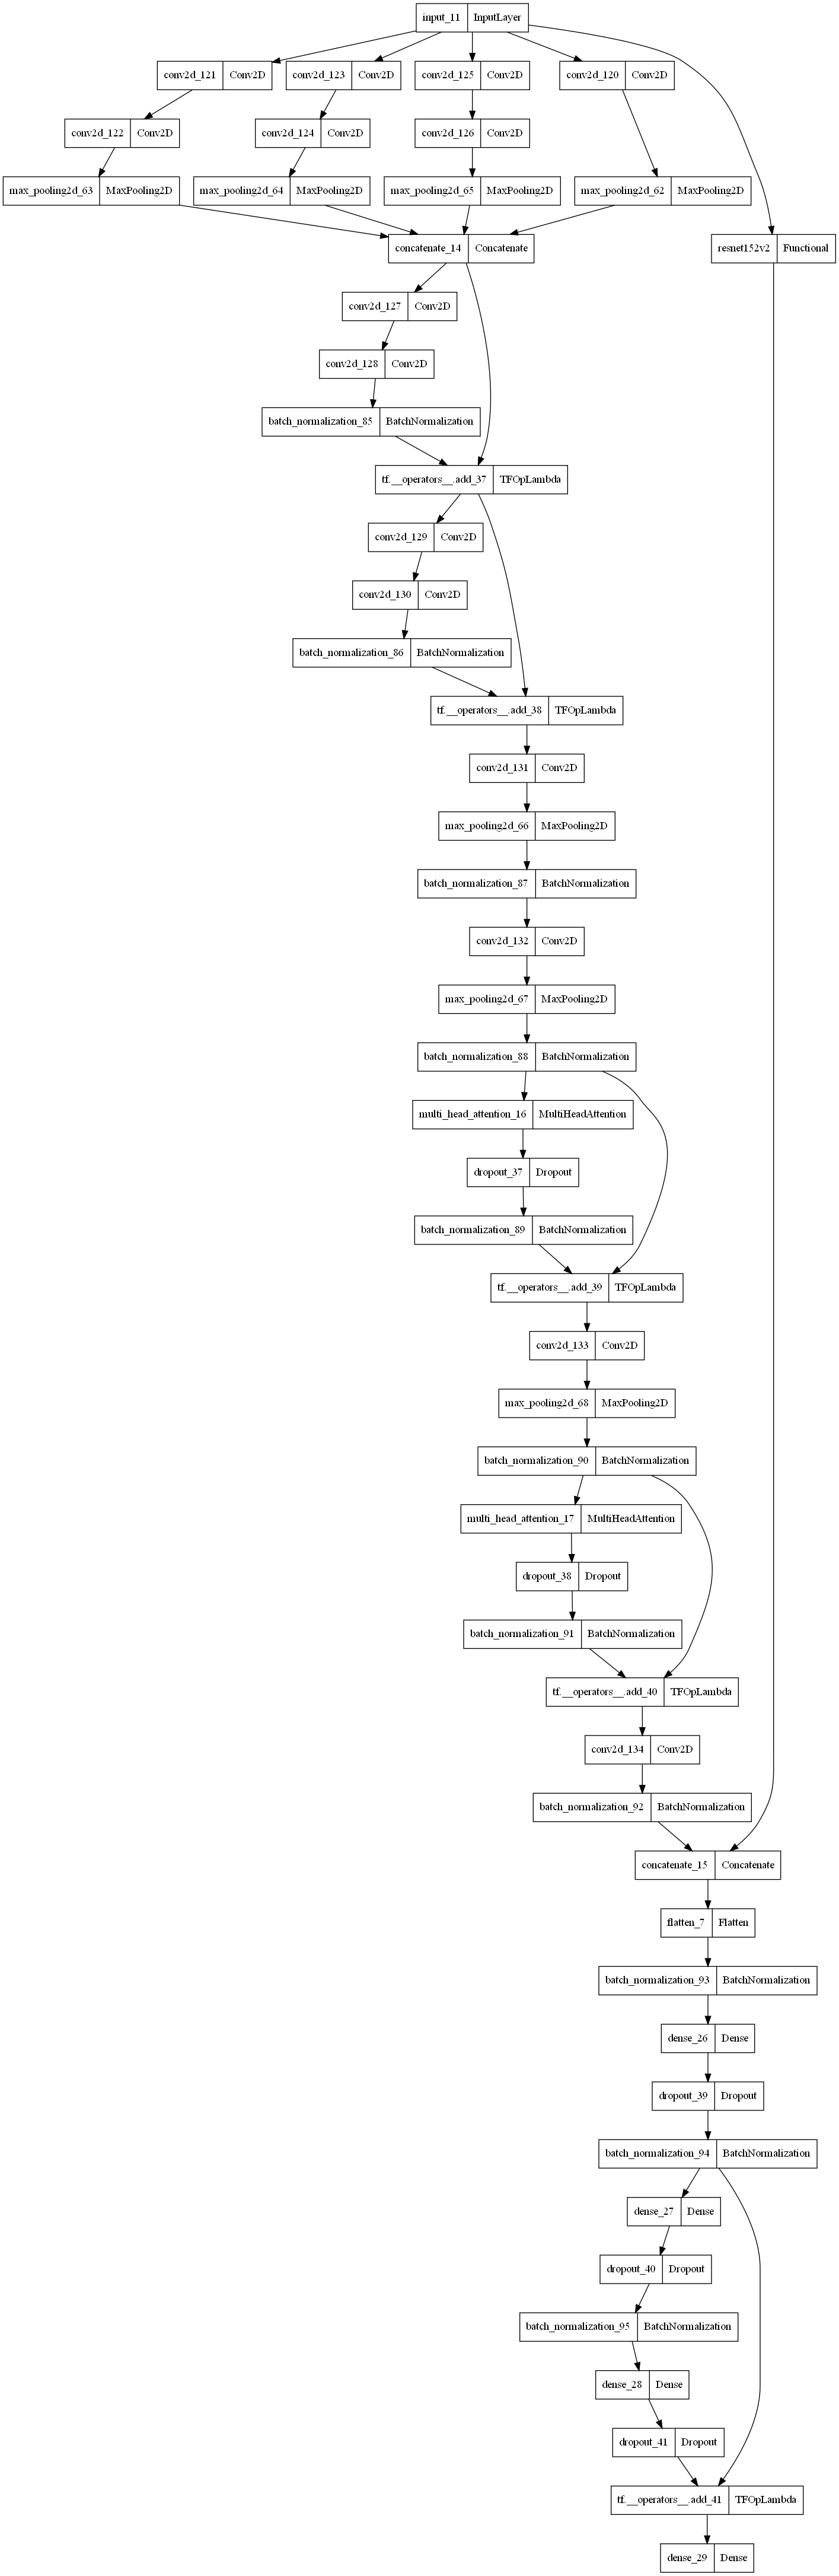

In [33]:
tf.keras.utils.plot_model(maze)

In [34]:
maze.compile(loss="sparse_categorical_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])




import time
import keras.callbacks as callbacks
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
time_callback = TimeHistory()
early_stopping_cb = callbacks.EarlyStopping(patience = 10,restore_best_weights=True,verbose = 1, monitor ="val_accuracy")
checkpoint_cb = callbacks.ModelCheckpoint(r"G:\MSc project\Mazemorelayerv2_res.h5",save_best_only=True,verbose = 1)

In [35]:
history = maze.fit(
train_gen,
epochs= 20,
steps_per_epoch= 152,
validation_data=valid_gen,
validation_steps = 27 ,
callbacks = [checkpoint_cb,early_stopping_cb],verbose = 1)


Epoch 1/20
152/152 [==============================] - ETA: 0s - loss: 0.5775 - accuracy: 0.8028 
Epoch 1: val_loss improved from inf to 2.73523, saving model to G:\MSc project\Mazemorelayerv2_res.h5
152/152 [==============================] - 1938s 13s/step - loss: 0.5775 - accuracy: 0.8028 - val_loss: 2.7352 - val_accuracy: 0.6830
Epoch 2/20
152/152 [==============================] - ETA: 0s - loss: 0.3348 - accuracy: 0.8849 
Epoch 2: val_loss improved from 2.73523 to 1.59692, saving model to G:\MSc project\Mazemorelayerv2_res.h5
152/152 [==============================] - 1994s 13s/step - loss: 0.3348 - accuracy: 0.8849 - val_loss: 1.5969 - val_accuracy: 0.7684
Epoch 3/20
 63/152 [===========>..................] - ETA: 17:41 - loss: 0.2615 - accuracy: 0.9139

KeyboardInterrupt: 

In [22]:
maze.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_46 (Conv2D)             (None, 150, 150, 32  128         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_48 (Conv2D)             (None, 150, 150, 32  128         ['input_6[0][0]']                
                                )                                                           

 dropout_12 (Dropout)           (None, 18, 18, 512)  0           ['multi_head_attention_6[0][0]'] 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 18, 18, 512)  2048       ['dropout_12[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 tf.__operators__.add_16 (TFOpL  (None, 18, 18, 512)  0          ['batch_normalization_34[0][0]', 
 ambda)                                                           'batch_normalization_33[0][0]'] 
                                                                                                  
 conv2d_58 (Conv2D)             (None, 18, 18, 1024  13108224    ['tf.__operators__.add_16[0][0]']
                                )                                                                 
          

In [18]:
tf.keras.utils.plot_model?